In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import (Activation,BatchNormalization,Concatenate,Dense,
                                     Embedding,Flatten,Input,Multiply,Reshape)
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D,Conv2DTranspose
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.datasets import mnist


In [ ]:
# 모델을 로드합니다.
generator = load_model('/content/drive/MyDrive/generator_model.h5')

# 모델을 다시 컴파일합니다.
generator.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

discriminator = load_model('/content/drive/MyDrive/discriminator_model.h5')
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.00001),
                      metrics=['accuracy'])

1/1 [==============================] - 0s 23ms/step


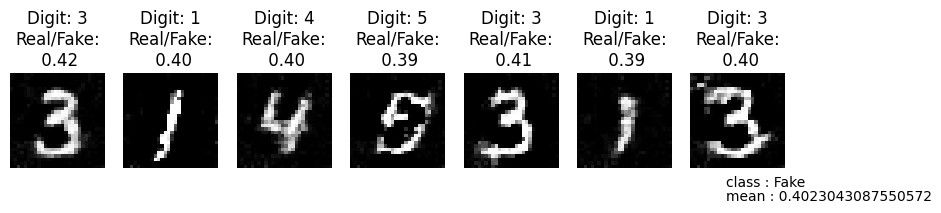

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_password(generator, discriminator, digits_list):
    z_dim = 100  # 여기서는 z_dim을 100으로 가정합니다.

    # 샘플링할 이미지의 수를 계산합니다.
    num_images = len(digits_list)

    # 랜덤한 잡음을 샘플링합니다.
    z = np.random.normal(0, 1, (num_images, z_dim))

    # 지정된 숫자로 레이블을 생성합니다.
    labels_to_generate = np.array(digits_list).reshape(-1, 1)

    # 랜덤한 잡음에서 이미지를 생성합니다.
    gen_imgs = generator.predict([z, labels_to_generate])

    # 이미지 픽셀 값을 [0, 1] 사이로 스케일을 변환합니다.
    gen_imgs = 0.5 * gen_imgs + 0.5

    # 이미지 그리드를 설정합니다.
    fig, axs = plt.subplots(1, num_images, figsize=(10, 2))
    totalFake = 0
    for i in range(num_images):
        axs[i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axs[i].axis('off')

        # 판별자를 사용하여 이미지가 진짜인지 가짜인지 판별합니다.
        real_or_fake = discriminator.predict([gen_imgs[i:i+1], labels_to_generate[i:i+1]])
        totalFake += real_or_fake
        title_str = "Digit: %d\nReal/Fake:\n %.2f" % (labels_to_generate[i], real_or_fake[0])
        axs[i].set_title(title_str)

    if float(totalFake) / len(digits_list) < 0.5:
        plt.text(10,33, "class : Fake")
        plt.text(10,37, f"mean : {float(totalFake) / len(digits_list)}")
    else:
        plt.text(10,33, "class : True")
        plt.text(10,37, f"mean : {float(totalFake) / len(digits_list)}")
    plt.show()


draw_password(generator, discriminator, [3,1,4,5,3,1,3])

In [ ]:
(X_train, y_train), (_, _) = mnist.load_data()

1/1 [==============================] - 0s 24ms/step


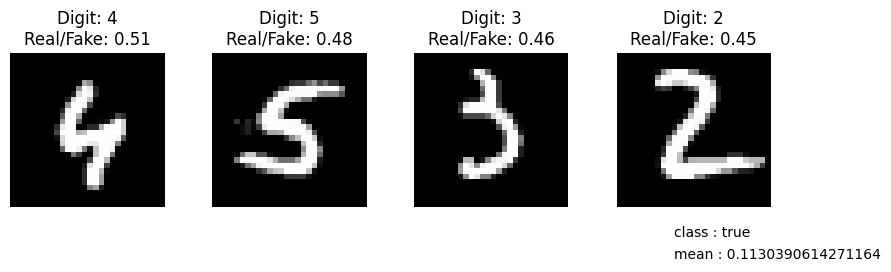

In [ ]:
def evaluate_mnist_images(generator, discriminator, digits_list):
    (X_train, y_train), (_, _) = mnist.load_data()
    # 이미지를 [-1, 1]로 정규화합니다.
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    selected_imgs = []
    selected_labels = []

    for digit in digits_list:
        idxs = np.where(y_train == digit)[0]
        selected_idx = np.random.choice(idxs)
        selected_imgs.append(X_train[selected_idx])
        selected_labels.append(digit)

    selected_imgs = np.array(selected_imgs)

    # 이미지 그리드를 설정합니다.
    fig, axs = plt.subplots(1, len(digits_list), figsize=(10, 2))
    totalFake = 0
    for i, img in enumerate(selected_imgs):
        axs[i].imshow(img[:, :, 0], cmap='gray')
        axs[i].axis('off')
        totalFake = 0
        # 판별자를 사용하여 이미지가 진짜인지 가짜인지 판별합니다.
        real_or_fake = discriminator.predict([img[None, ...], np.array([selected_labels[i]])])
        if real_or_fake > 0.5:
            true = True
        totalFake += real_or_fake
        title_str = "Digit: %d\nReal/Fake: %.2f" % (selected_labels[i], real_or_fake[0])
        axs[i].set_title(title_str)

    if true:
            plt.text(10,33, "class : true")
        plt.text(10,37, f"mean : {float(totalFake) / len(digits_list)}")
    else:
        plt.text(10,33, "class : fake")
        plt.text(10,37, f"mean : {float(totalFake) / len(digits_list)}")
    plt.show()

# 예제 사용
evaluate_mnist_images(generator, discriminator, [4,5,3,2])